In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


In [9]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

    import matplotlib.pyplot as plt

    # make the pie circular by setting the aspect ratio to 1
    plt.figure(figsize=plt.figaspect(1))
    values = [3, 12, 5, 8]
    labels = ['a', 'b', 'c', 'd']


    return my_autopct

def make_autopct(values, labels):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        #return '{p:.2f}% ({v:d})'.format(p=pct, v=values)
    return my_autopct

def CalcPercantage(values):
    total = sum(values)
    per = []
    for v in values:
        per.append(100*v/total)
    return per

In [10]:

Bi_rads = pd.read_excel(r'i:\works\mam\INbreast.xls',parse_cols='H');
Bi_rads = list(Bi_rads.values.flatten()); # Convert to list

# Convert each 4a\4b\4c values into a value of 4:
Bi_rads = [4 if x == '4a' else x for x in Bi_rads];
Bi_rads = [4 if x == '4b' else x for x in Bi_rads];
Bi_rads = [4 if x == '4c' else x for x in Bi_rads];

Bi_rads = Bi_rads[:len(Bi_rads) - 1]; # Exclude the last row
Bi_rads = np.asarray(Bi_rads); # Convert to array

# ACRs
ACRs = pd.read_excel(r'i:\works\mam\INbreast.xls',parse_cols='G');
ACRs = list(ACRs.values.flatten()); # Convert to list
ACRs = ACRs[:len(Bi_rads) - 1]; # Exclude the last row
ACRs = np.asarray(ACRs); # Convert to array

# =============================================================================
#  MIAS database
# =============================================================================


Bi_Rads_MIAS = pd.read_excel('i:\works\mam\MIAS.xls',parse_cols='B');

Bi_Rads_MIAS = list(Bi_Rads_MIAS.values.flatten()); # Convert to list

# Convert each 4a\4b\4c values into a value of 4:
Bi_Rads_MIAS_no = [1 if x == 'F' else x for x in Bi_Rads_MIAS];
Bi_Rads_MIAS_no = [2 if x == 'G' else x for x in Bi_Rads_MIAS_no];
Bi_Rads_MIAS_no = [3 if x == 'D' else x for x in Bi_Rads_MIAS_no];
Bi_Rads_MIAS_no = np.asarray(Bi_Rads_MIAS_no); # Convert to array

# =============================================================================
# Plot histograms
# Pie

# Corrected 2
# =============================================================================
#
# =============================================================================
# INBreast database
# =============================================================================

# Pie chart

resultsMIAS, edgesMIAS = np.histogram(Bi_Rads_MIAS_no, bins = range(5));
resultsMIASPer = CalcPercantage(resultsMIAS)

resultsINBREAST, edgesINBREAST = np.histogram(ACRs, bins = range(6));
resultsINBREASTPer = CalcPercantage(resultsINBREAST)

resultsINBREAST_Birad, edgesINBREAST_Birad = np.histogram(Bi_rads, bins = range(8));
resultsINBREAST_Birad_Per = CalcPercantage(resultsINBREAST_Birad)

labelsMIAS = []
labelsMIAS.append('Almost entirely \n fatty ({:2.1f}%)'.format(resultsMIASPer[1]))
labelsMIAS.append('Fibroglandular \n density ({:2.1f}%)'.format(resultsMIASPer[2]))
labelsMIAS.append('Heterogeneously \n dense ({:2.1f}%)'.format(resultsMIASPer[3]))

labelsINBREAST = []
labelsINBREAST.append('Almost entirely fatty \n (BI-RAD density 1)({:2.1f}%)'.format(resultsINBREASTPer[1]))
labelsINBREAST.append('Fibroglandular density \n (BI-RAD density 2)({:2.1f}%)'.format(resultsINBREASTPer[2]))
labelsINBREAST.append('Heterogeneously dense \n (BI-RAD density 3)({:2.1f}%)'.format(resultsINBREASTPer[3]))
labelsINBREAST.append('Extremely dense \n (BI-RAD density 4)({:2.1f}%)'.format(resultsINBREASTPer[4]))

labelsINBREAST_Birad = []
labelsINBREAST_Birad.append('BI-RAD 0 ({:2.1f}%)'.format(resultsINBREAST_Birad_Per[1]))
labelsINBREAST_Birad.append('BI-RAD 1 ({:2.1f}%)'.format(resultsINBREAST_Birad_Per[2]))
labelsINBREAST_Birad.append('BI-RAD 2 ({:2.1f}%)'.format(resultsINBREAST_Birad_Per[3]))
labelsINBREAST_Birad.append('BI-RAD 3 ({:2.1f}%)'.format(resultsINBREAST_Birad_Per[4]))
labelsINBREAST_Birad.append('BI-RAD 4 ({:2.1f}%)'.format(resultsINBREAST_Birad_Per[5]))
labelsINBREAST_Birad.append('BI-RAD 5 ({:2.1f}%)'.format(resultsINBREAST_Birad_Per[6]))

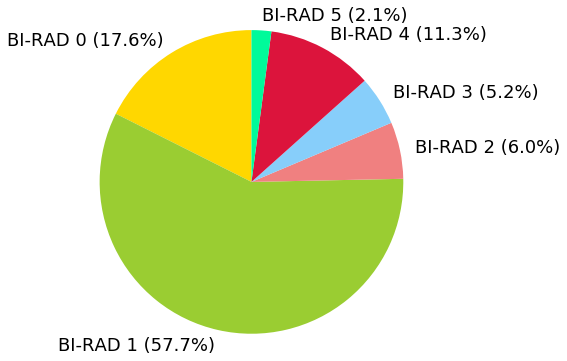

In [21]:
colors = ['navy', 'maroon', 'darkmagenta', 'darkslategray','crimson','mediumspringgreen']

colors = ['navy', 'maroon', 'darkmagenta', 'darkslategray','crimson','mediumspringgreen']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','crimson','mediumspringgreen']

#fig = plt.figure(1)
fig, ax1 = plt.subplots()
#plt.clf()
#fig.clf()
plt.rcParams['font.size'] = 18.0
fig.set_size_inches(6,6)
patches, texts, autotexts = ax1.pie(resultsINBREAST_Birad[1:], colors = colors, labels=labelsINBREAST_Birad, autopct='', startangle=90)
#ax1.text(-0.067, -1.30, '(a)', {'color': 'k', 'fontsize': 18})
ax1.axis('equal')
plt.savefig('INBreast database BIRAD classification.eps', format='eps', dpi=600);


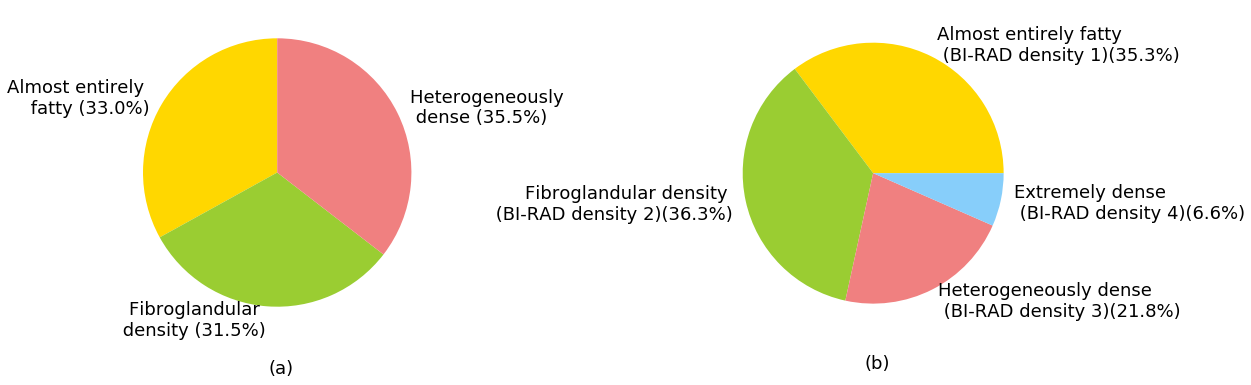

In [22]:
%matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
plt.rcParams['font.size'] = 18.0
#fig, ax1 = plt.subplots(figsize=(4,4))
#plt.figure(figsize=(20,10))
#fig, ax1 = plt.subplots()
#fig.set_size_inches(10,8)
#plt.figure(figsize=(20,10)) – StackG Apr 25 '15 at 10:16

#fig, ax = plt.subplots(figsize=(20, 10))
#fig.set_size_inches(16,12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
patches, texts, autotexts = ax1[0].pie(resultsMIAS[1:], colors = colors, labels=labelsMIAS, autopct='', startangle=90) #, labeldistance=-0.5) #, pctdistance=1.1,
ax1[0].axis('equal')
ax1[0].text(-0.067, -1.50, '(a)', {'color': 'k', 'fontsize': 18})
#fig.show()
#plt.savefig('Mini-MIAS database densities');

#fig, ax1 = plt.subplots()
#fig.set_size_inches(16,12)
ax1[1].axis('equal')
ax1[1].text(-0.067, -1.50, '(b)', {'color': 'k', 'fontsize': 18})
#patches, texts, autotexts = ax2.pie(resultsINBREAST[1:], colors=colors, labels=labelsINBREAST, autopct=make_autopct(labelsINBREAST), startangle=90)
patches, texts, autotexts = ax1[1].pie(resultsINBREAST[1:], colors = colors, labels=labelsINBREAST, autopct='', startangle=0)
#fig.set_size_inches(4, 2, forward=True)
#fig = plt.gcf()
#fig.set_size_inches(2,2) # or (4,4) or (5,5) or whatever
#fig.show()
#plt.savefig('INBreast database BIRAD densities');
plt.savefig('Mini-MIAS and INBreast database BIRAD densities.eps', format='eps', dpi=600);
#plt.savefig('destination_path.eps', format='eps', dpi=1000)
#show()


AttributeError: 'numpy.ndarray' object has no attribute 'pie'

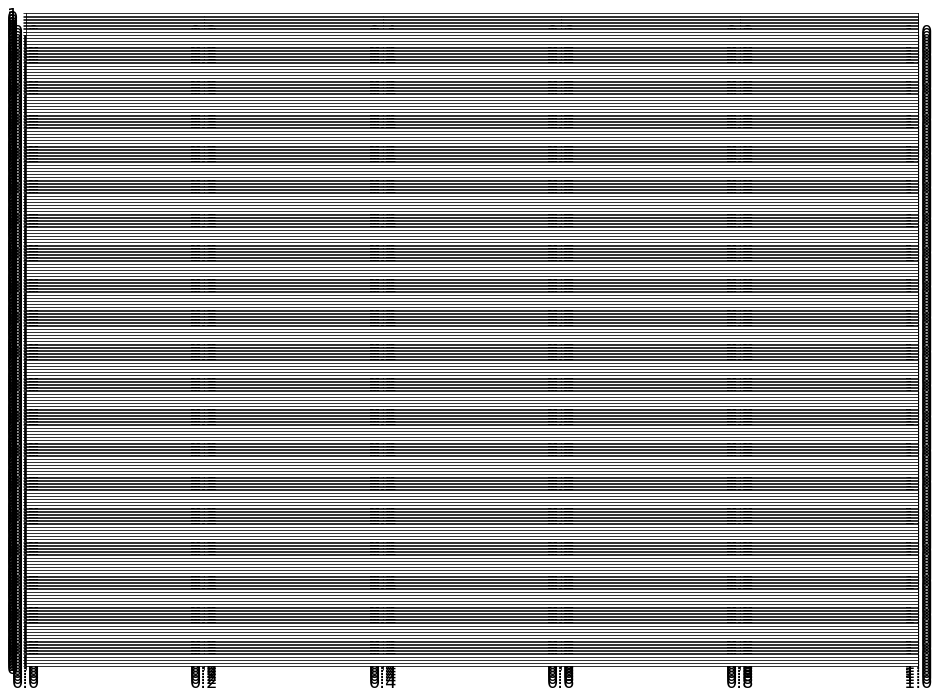

In [23]:
fig, ax1 = plt.subplots(211)
fig.set_size_inches(16,12)
patches, texts, autotexts = ax1.pie(resultsMIAS[1:], labels=labelsMIAS, autopct='', startangle=90) #, labeldistance=-0.5) #, pctdistance=1.1,
ax1.axis('equal')
ax1.text(-0.067, -1.30, '(a)', {'color': 'k', 'fontsize': 20})
fig.show()
plt.savefig('Mini-MIAS database densities');

fig, ax1 = plt.subplots(212)
fig.set_size_inches(16,12)
ax1.axis('equal')
ax1.text(-0.067, -1.30, '(b)', {'color': 'k', 'fontsize': 20})
#patches, texts, autotexts = ax2.pie(resultsINBREAST[1:], colors=colors, labels=labelsINBREAST, autopct=make_autopct(labelsINBREAST), startangle=90)
patches, texts, autotexts = ax1.pie(resultsINBREAST[1:], colors=colors, labels=labelsINBREAST, autopct='', startangle=0)
plt.savefig('INBreast database BIRAD densities.eps', format='eps', dpi=600);